<h1 style="text-align:center; background-color:#e6e6e6; color:black; padding:10px; border-radius:5px;">Lead Scoring Case Study _ Logistic Regression</h1>

### **Model Development Steps**

**STEP 1: DATA IMPORT**  
Load the dataset using pandas.  

**STEP 2: DATA EXPLORATION**  
Analyze the dataset structure, check for missing values, and compute basic statistics.  

**STEP 3: DATA PREPROCESSING**  
Handle missing values, encode categorical variables, and clean the dataset for analysis.  

**STEP 4: EXPLORATORY DATA ANALYSIS (EDA)**  
Visualize data trends, patterns, and relationships through plots and statistical summaries.  

**STEP 5: FEATURE SCALING**  
Normalize or standardize numerical features to enhance model efficiency.  

**STEP 6: MODEL TRAINING**  
Train a logistic regression model using the prepared dataset.  

**STEP 7: FEATURE SELECTION WITH RFE**  
Identify the most influential features by recursively eliminating less important ones.  

**STEP 8: PREDICTIONS**  
Use the trained model to generate predictions on the test dataset.  

**STEP 9: MODEL EVALUATION**  
Measure model performance using accuracy, confusion matrix, and classification metrics.  

**STEP 10: ROC CURVE ANALYSIS**  
Assess the model’s classification ability by plotting the ROC curve and computing the AUC score.  

**STEP 11: OPTIMAL THRESHOLD SELECTION**  
Determine the best probability cutoff for classifying outcomes effectively.  

**STEP 12: FEATURE IMPORTANCE & FINAL INSIGHTS**  
Analyze key features influencing predictions and summarize findings.  


### 🔧 **Module Importation**  

In [4]:
#python
import os
import pandas as pd
import numpy as np

#ML 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve,roc_auc_score

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Warnings
import warnings 
warnings.filterwarnings("ignore")

### 🚀 **Step 1: Data Import**

In [6]:
leads = pd.read_csv('leads.csv')

In [7]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 🔍 **Step 2: Data Exploration** 

In [9]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 🛠 **Step 3: Data Preprocessing**

In [12]:
leads=leads.replace('Select',np.nan)

In [13]:
round(leads.isnull().sum()/leads.shape[0]*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
leads=leads.drop(['Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Receive More Updates About Our Courses'],axis=1)

In [15]:
leads=leads.drop(['How did you hear about X Education','Lead Profile'],axis=1)

In [16]:
leads=leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [17]:
leads['Lead Quality']=leads['Lead Quality'].replace(np.nan,'Not sure')

In [18]:
leads['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [19]:
leads['Country']=leads['Country'].fillna('India')

In [20]:
leads['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [21]:
leads['Specialization']=leads['Specialization'].fillna('Finance Management')

In [22]:
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [23]:
leads['What is your current occupation']=leads['What is your current occupation'].fillna('Unemployed')

In [24]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [25]:
leads['What matters most to you in choosing a course']=leads['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [26]:
leads['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [27]:
leads['City']=leads['City'].fillna('Mumbai')

In [28]:
leads['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [29]:
leads['Tags']=leads['Tags'].fillna('Will revert after reading the email')

In [30]:
round(leads.isnull().sum()/leads.shape[0]*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [31]:
leads.dropna(inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Ringing,Not sure,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Ringing,Not Sure,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,No,Modified


### 📊 **Step 4: Exploratory Data Analysis (EDA)**

In [33]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Ringing,Not sure,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Ringing,Not Sure,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,No,Modified


In [34]:
leads['Converted'].value_counts(normalize=True)

Converted
0    0.621446
1    0.378554
Name: proportion, dtype: float64

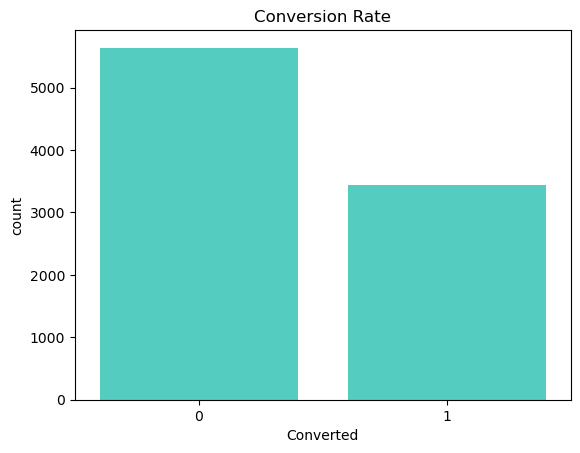

In [35]:
sns.countplot(data=leads,x='Converted',color="turquoise")
plt.title('Conversion Rate')
plt.show()

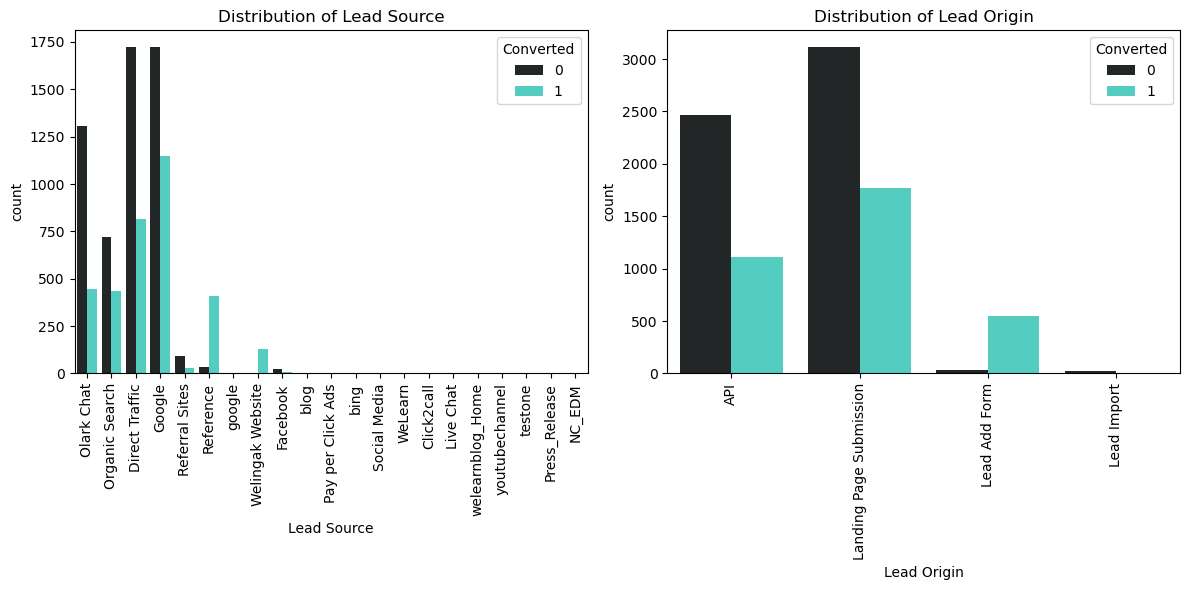

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    ax = axes[i]  # Use subplot axes
    sns.countplot(x=feature, hue='Converted', data=leads, ax=ax, color="turquoise")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

### `OBSERVATIONS:`  
`• API and Landing Page Submission show a low conversion rate (~30%), but they contribute a substantial number of leads.`  
`• Lead Add Form generates fewer leads but maintains a high conversion rate, highlighting its efficiency in attracting quality leads.`  
`• Lead Import has both a minimal lead count and a low conversion rate, making it less significant and potentially negligible.`  


In [38]:
# We can clearly observe that the count of leads from various sources are close to negligible 
# and hence we can club them into "Others" for better visualization and analysis

In [39]:
leads['Lead Source']=leads['Lead Source'].replace(['Click2call','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release',
                                                   'NC_EDM','blog', 'Pay per Click Ads', 'bing','Social Media', 'WeLearn'],'Other_Lead_sources')

In [40]:
leads['Lead Source']=leads['Lead Source'].replace(['google'],'Google')

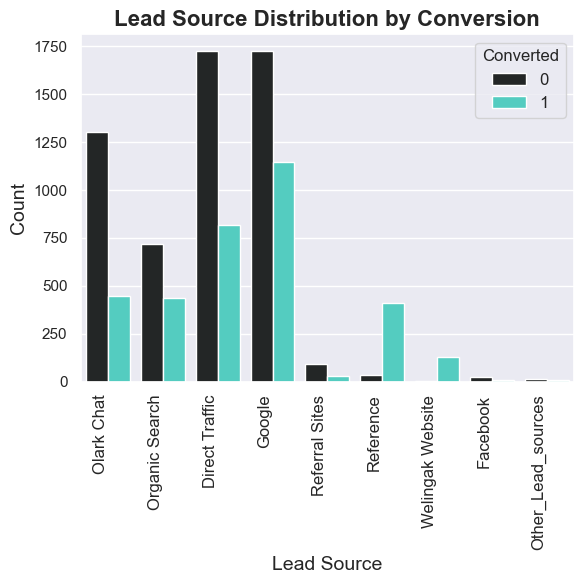

In [41]:
# Set a white grid style for a clean look
sns.set(style="darkgrid")

# Create a figure with a specified size
plt.figure(figsize=(6,6))

# Create the countplot with a custom palette
ax = sns.countplot(x='Lead Source', hue='Converted', data=leads, color="turquoise")

# Customize title and axis labels
ax.set_title('Lead Source Distribution by Conversion', fontsize=16, fontweight='bold')
ax.set_xlabel('Lead Source', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=12)

# Customize legend
plt.legend(title='Converted', fontsize=12, title_fontsize=12)

# Adjust layout for a neat fit
plt.tight_layout()

# Display the plot
plt.show()

### `OBSERVATIONS:`  

`• Google and Direct Traffic contribute the highest volume of leads.`  
`• Reference and Welingak Website achieve the highest conversion rates.`  
**`To enhance overall lead conversion, focus should be on improving the conversion rates of Google, Olark Chat, Organic Search, and Direct Traffic, while also increasing lead generation from Reference and Welingak Website.`**  

In [43]:
leads['TotalVisits'] = leads['TotalVisits'].astype(int)

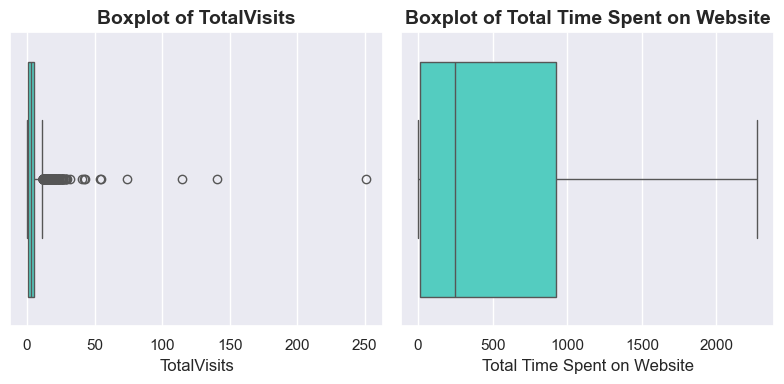

In [44]:
# Set a clean theme
sns.set_theme(style="darkgrid")

# Define the features to plot
features = ['TotalVisits', 'Total Time Spent on Website']

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Loop through features and plot boxplots
for i, feature in enumerate(features):
    sns.boxplot(x=leads[feature], ax=axes[i], color="turquoise")
    axes[i].set_title(f'Boxplot of {feature}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=12)
    
# Adjust layout
plt.tight_layout()
plt.show()

In [45]:
# Calculate Q1, Q3, and IQR
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1

# Compute Upper Cap
upper_cap = Q3 + 1.5 * IQR

# Replace values greater than the upper cap with the upper cap using np.where
leads['TotalVisits'] = np.where(leads['TotalVisits'] > upper_cap, upper_cap, leads['TotalVisits'])

<Axes: xlabel='TotalVisits'>

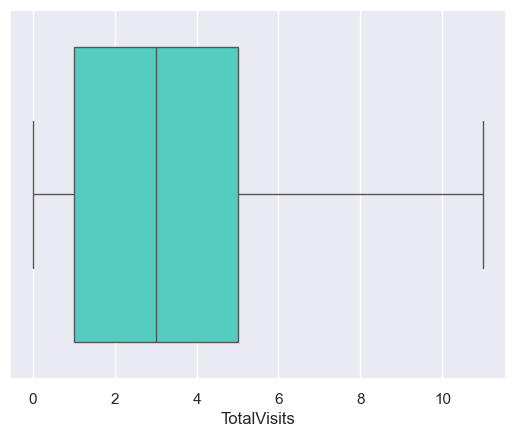

In [46]:
 sns.boxplot(x=leads['TotalVisits'], color="turquoise")

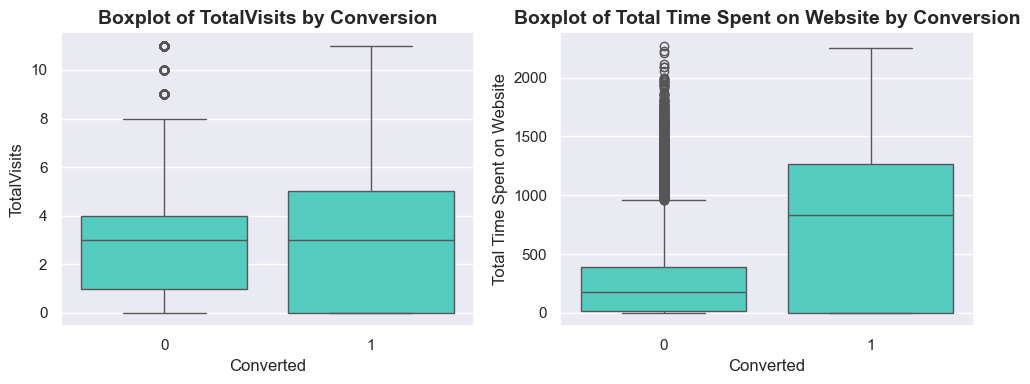

In [47]:
sns.set_theme(style="darkgrid")

# Define features
features = ["TotalVisits", "Total Time Spent on Website"]

# Create subplots: 1 row, 2 columns, and a larger figure size for clarity
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Loop through the features and create a boxplot for each
for i, feature in enumerate(features):
    sns.boxplot(x='Converted', y=feature, data=leads, ax=axes[i], color="turquoise")
    axes[i].set_title(f'Boxplot of {feature} by Conversion', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Converted', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

# Adjust the layout to prevent overlapping elements
plt.tight_layout()
plt.show()

### `OBSERVATIONS:`  

`• The median values for both converted and non-converted leads are identical, making this metric inconclusive for distinguishing outcomes.`  

`• Users who spend more time on the website have a higher likelihood of conversion.`  

`• Enhancing the website’s appeal could help increase user engagement and encourage longer visit durations.`  


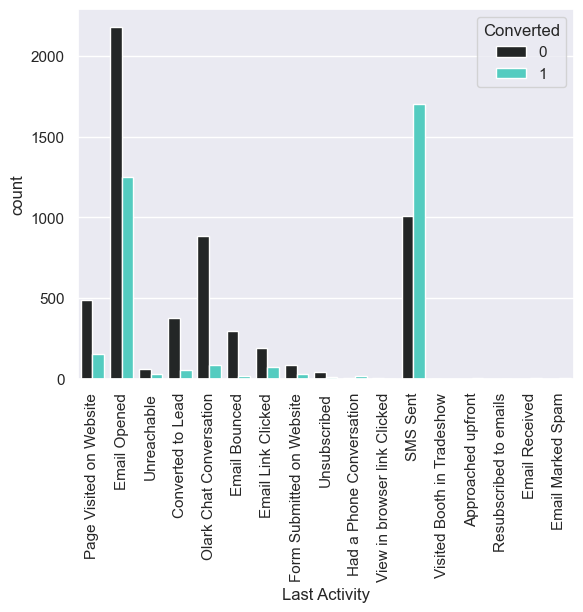

In [49]:
sns.countplot(x='Last Activity', hue='Converted', data=leads, color="turquoise")
plt.xticks(rotation=90)
plt.show()

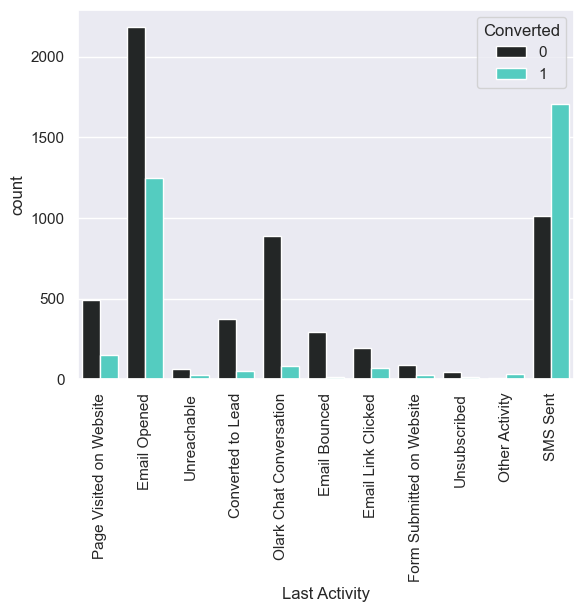

In [50]:
# Converting all the low count categories to the 'Others' category
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= leads, color="turquoise")
plt.xticks( rotation=90)
plt.show()

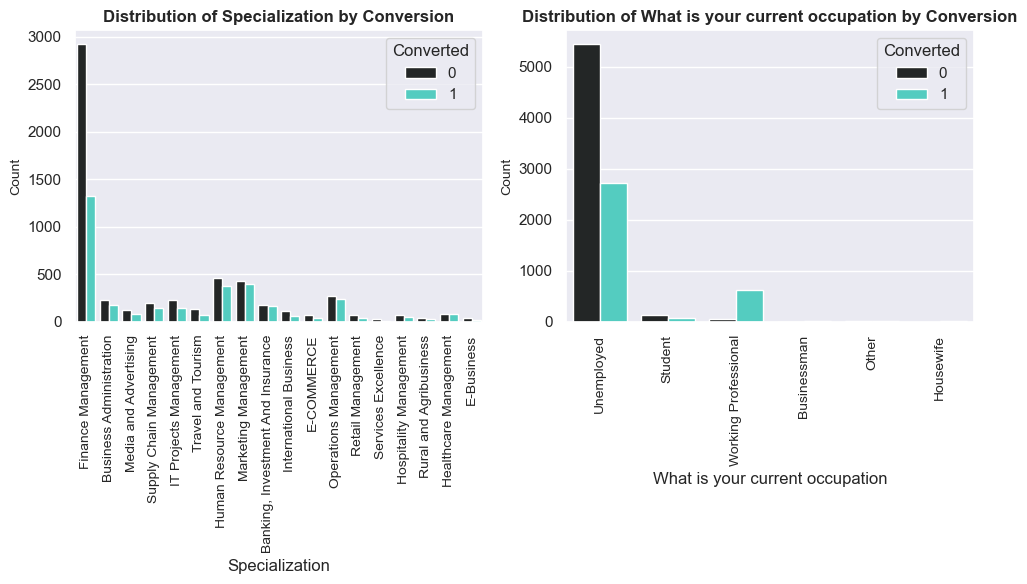

In [51]:
sns.set_theme(style="darkgrid")

# Define the features
features = ["Specialization", "What is your current occupation"]

# Create subplots: 1 row, 2 columns with a suitable figure size
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Loop through each feature and create a countplot
for i, feature in enumerate(features):
    sns.countplot(x=feature, hue="Converted", data=leads, color="turquoise", ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} by Conversion", fontsize=12, fontweight="bold")
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
    # Optionally, you can set x and y labels if needed:
    axes[i].set_xlabel(f"{feature}")
    axes[i].set_ylabel("Count", fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [52]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace("Other", 'Other_Occupation')

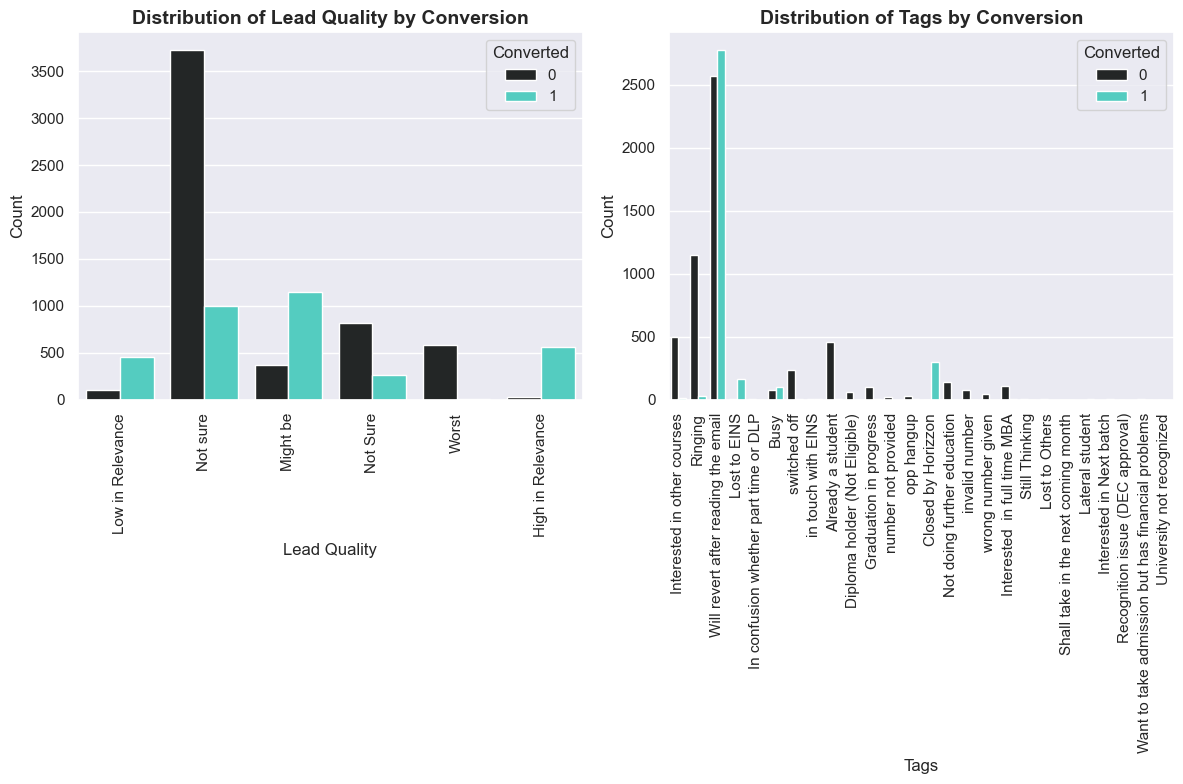

In [53]:
sns.set_theme(style="darkgrid")

# Define the features
features = ["Lead Quality", "Tags"]

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Loop through the features and create a countplot for each
for i, feature in enumerate(features):
    sns.countplot(x=feature, hue="Converted", data=leads, color='turquoise', ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} by Conversion", fontsize=14, fontweight="bold")
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()

### `OBSERVATION:`  

`• Based on the above plot, no clear conclusions can be drawn regarding Specialization.`  
`• The data suggests that Working Professionals have a higher conversion rate.`  
`• The number of Unemployed leads is the highest among all categories.`  

**To improve the overall conversion rate, efforts should be made to attract more Working Professional leads by targeting platforms like LinkedIn and other professional networks, while also focusing on increasing the conversion rate of Unemployed leads.**  

**The columns 'Country', 'What matters most to you in choosing a course', and 'City' predominantly contain a single value, such as India for Country and Mumbai for City, providing limited insights for analysis.**  


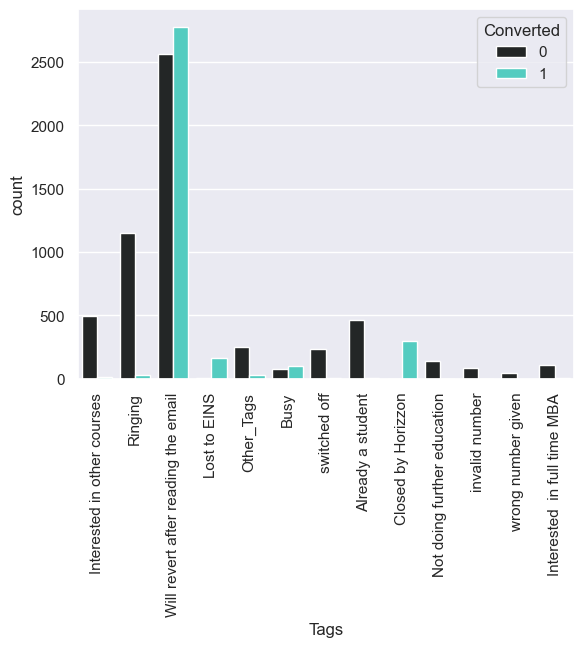

In [55]:
# Converting all low count categories to Others category
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

# lets plot the Tags again
sns.countplot(x="Tags", hue="Converted", data= leads, color='turquoise')
plt.xticks( rotation='vertical')
plt.show()

In [56]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Ringing,Not sure,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Ringing,Not Sure,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,No,Modified


In [57]:
leads = leads.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations',
           'A free copy of Mastering The Interview','Country','Do Not Call'],axis=1)

leads.head()


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Not sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### `SUMMARY:`  

`• To enhance the overall lead conversion rate, focus should be placed on improving the conversion rate of 'API' and 'Landing Page Submission' Lead Origins, while also increasing the lead count from 'Lead Add Form'.`  

`• Increasing the conversion rate of Google, Olark Chat, Organic Search, and Direct Traffic is essential, along with generating more leads from Reference and Welingak Website.`  

`• Enhancing the website’s design and user experience can help increase engagement and time spent on the site.`  

`• Leads with the last activity as 'Email Opened' should be followed up with a call, while efforts should be made to increase the number of leads with the last activity as 'SMS Sent'.`  

`• To improve overall conversion rates, efforts should be made to attract more Working Professional leads through targeted outreach on platforms like LinkedIn, while also optimizing conversion strategies for Unemployed leads.`  

`• Some columns contain predominantly a single unique value, limiting their usefulness, and can be excluded from further analysis.`  


### ⚖️ **Step 5: Feature Scaling** 

In [60]:
scaler=StandardScaler() #used to bring values from different range between 0 to 1

leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [61]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,-1.121546,-0.885664,-1.096911,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,0.614180,0.350519,0.060094,Email Opened,Finance Management,Unemployed,Ringing,Not sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,-0.427256,1.924177,-0.171307,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,-0.774401,-0.326263,-0.634109,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,-0.427256,1.733431,-0.634109,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Dummy Variable Creation

In [63]:
dummy=pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity']],drop_first=True)

In [64]:
dummy=dummy.apply(pd.to_numeric).astype(int) #To change true false into 1 and 0

In [65]:
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_sources,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'],axis=1,inplace=True)

In [67]:
leads.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,No,0,-1.121546,-0.885664,-1.096911
1,2a272436-5132-4136-86fa-dcc88c88f482,No,0,0.614180,0.350519,0.060094
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,No,1,-0.427256,1.924177,-0.171307
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,No,0,-0.774401,-0.326263,-0.634109
4,3256f628-e534-4826-9d63-4a8b88782852,No,1,-0.427256,1.733431,-0.634109


In [68]:
leads=pd.concat([leads,dummy],axis=1)

In [69]:
leads['Do Not Email']=leads['Do Not Email'].apply(lambda x:1 if x=="Yes" else 0)

In [70]:
leads.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,-1.121546,-0.885664,-1.096911,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0.614180,0.350519,0.060094,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,-0.427256,1.924177,-0.171307,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,-0.774401,-0.326263,-0.634109,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,-0.427256,1.733431,-0.634109,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
X=leads.drop(['Prospect ID','Converted'],axis=1)

y=leads['Converted']

print(y)

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


In [72]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,-1.121546,-0.885664,-1.096911,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0.614180,0.350519,0.060094,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,-0.427256,1.924177,-0.171307,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.774401,-0.326263,-0.634109,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,-0.427256,1.733431,-0.634109,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


### **`Test-Train Split `**

In [74]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [75]:
### Checking the Conversion Rate

print("Conversion rate is ", (sum(leads['Converted'])/len(leads['Converted'].index))*100)

Conversion rate is  37.85541106458012


**`We're checking correlation to identify relationships between features and avoid multicollinearity, which can negatively impact model performance. It helps in feature selection and improving predictive accuracy.`**

In [77]:
conv_corr = X.corr()

conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool_)).stack().sort_values(ascending=False).head(10)


Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.730009
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.594369
dtype: float64

### Checking VIFs

In [79]:
def calculate_vif(X_train):
    X_const = sm.add_constant(X_train)
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_const.columns
    vif_df['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    return vif_df[vif_df['VIF']>10]

calculate_vif(X)

,Features,VIF
0,const,10805.78
77,Last Notable Activity_Modified,2199.07
73,Last Notable Activity_Email Opened,2048.65
81,Last Notable Activity_SMS Sent,1730.01
79,Last Notable Activity_Page Visited on Website,324.74
78,Last Notable Activity_Olark Chat Conversation,189.80
71,Last Notable Activity_Email Link Clicked,181.19
46,What is your current occupation_Unemployed,104.28
47,What is your current occupation_Working Profes...,80.26
6,Lead Origin_Lead Add Form,73.67


In [80]:
vif_df = calculate_vif(X)

# Identify high VIF features
high_vif_features = vif_df[vif_df['VIF'] > 10]['Features'].tolist()
print("Features to drop:", high_vif_features)

Features to drop: ['const', 'Last Notable Activity_Modified', 'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Page Visited on Website', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Email Link Clicked', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Lead Origin_Lead Add Form', 'Last Notable Activity_Email Bounced', 'Lead Source_Reference', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_Unreachable', 'Lead Source_Facebook', 'Lead Origin_Lead Import', 'What is your current occupation_Student', 'Lead Source_Welingak Website', 'Last Notable Activity_Had a Phone Conversation']


In [81]:
X_train = X_train.drop(columns=high_vif_features, errors='ignore')
X_test = X_test.drop(columns=high_vif_features, errors='ignore')

In [82]:
calculate_vif(X_train)

,Features,VIF
0,const,104.2


In [83]:
calculate_vif(X_test)

,Features,VIF
0,const,110.27


In [84]:
conv_corr = X_train.corr()

conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool_)).stack().sort_values(ascending=False).head(10)

TotalVisits                  Page Views Per Visit                     0.732262
Do Not Email                 Last Activity_Email Bounced              0.614166
Page Views Per Visit         Lead Origin_Landing Page Submission      0.482901
TotalVisits                  Lead Origin_Landing Page Submission      0.444781
Lead Source_Olark Chat       Last Activity_Olark Chat Conversation    0.427924
                             Specialization_Finance Management        0.409528
TotalVisits                  Total Time Spent on Website              0.359625
Total Time Spent on Website  Page Views Per Visit                     0.319197
TotalVisits                  Lead Source_Organic Search               0.315631
Page Views Per Visit         Lead Source_Organic Search               0.311514
dtype: float64

### 🎯 **Step 6: Model Training**  

In [86]:
# Add a constant (intercept term) to X_train
X_train_const = sm.add_constant(X_train)  

# Fit the logistic regression model using GLM
logm1 = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())

# Fit the model and get the summary
logm1_fit = logm1.fit()
print(logm1_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1386.1
Date:                Sat, 22 Feb 2025   Deviance:                       2772.1
Time:                        15:28:12   Pearson chi2:                 7.89e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5891
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

The model appears to have a moderate fit (with a pseudo R-squared of 0.5891) and several significant predictors. However, there are signs that some coefficients might be unstable or that certain predictors might need further investigation due to possible multicollinearity or sparse data issues. Overall,

✅ Moderate-to-Good Model  
⚠️ Can be improved by removing non-significant variables and handling multicollinearity.  
🔍 Next Steps: Check VIF values, perform feature selection (RFE), and retrain the model.

### 🔬 **Step 7: Feature Selection (RFE)**  

In [89]:
# Starting with 17 features selected by RFE
# We will then optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=17)  
rfe = rfe.fit(X_train, y_train)

rfe=rfe.fit(X_test,y_test)

In [90]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not sure', 'Lead Quality_Worst'],
      dtype='object')


In [91]:
X_train_sm = sm.add_constant(X_train[selected_features])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.7
Date:                Sat, 22 Feb 2025   Deviance:                       2895.3
Time:                        15:28:15   Pearson chi2:                 7.43e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5811
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1642      0.301    -10.513      0.000      -3.754      -2.574
Do Not Email                                -0.4925      0.216     -2.276      0.023      -0.917      -0.068
Total Time Spent on Website                  0.8697      0.053     16.418      0.000       0.766       0.974
Lead Origin_Landing Page Submission         -1.2665      0.110    -11.542      0.000      -1.482      -1.051
Last Activity_Email Opened                   1.2578      0.134      9.392      0.000       0.995       1.520
Last Activity_Other Activity                 2.0896      1.046      1.997      0.046       0.039       4.140
Last Activity_SMS Sent                       2.7468      0.139     19.724      0.000       2.474       3.020
Last Activity_Unreachable                    0.3927      0.611      0.642      0.521      -0.806       1.591
Tags_Busy                                    2.3296      0.352      6.616      0.000       1.639       3.020
Tags_Closed by Horizzon                      9.9760      0.815     12.241      0.000       8.379      11.573
Tags_Interested  in full time MBA            0.2574      0.842      0.306      0.760      -1.393       1.907
Tags_Interested in other courses            -0.1416      0.459     -0.309      0.758      -1.041       0.758
Tags_Lost to EINS                           10.1443      0.691     14.684      0.000       8.790      11.498
Tags_Ringing                                -1.2161      0.361     -3.369      0.001      -1.924      -0.509
Tags_Will revert after reading the email     5.4140      0.310     17.485      0.000       4.807       6.021
Tags_switched off                           -1.8174      0.674     -2.697      0.007      -3.138      -0.497
Lead Quality_Not sure                       -4.0689      0.153    -26.560      0.000      -4.369      -3.769
Lead Quality_Worst                          -2.5910      0.729     -3.556      0.000      -4.019      -1.163
============================================================================================================
"""

### 📈 **Step 8: Making Predictions** 

In [93]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3563    0.983367
273     0.005008
1903    0.001364
4982    0.996193
3213    0.121785
7029    0.001507
6579    0.998779
1384    0.105096
6440    0.964523
2369    0.069829
dtype: float64

In [94]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98336733, 0.00500814, 0.00136448, 0.99619271, 0.12178483,
       0.00150736, 0.99877891, 0.10509589, 0.96452251, 0.0698289 ])

In [95]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,1,0.983367,3563
1,0,0.005008,273
2,0,0.001364,1903
3,1,0.996193,4982
4,0,0.121785,3213


In [96]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,1,0.983367,3563,1
1,0,0.005008,273,0
2,0,0.001364,1903,0
3,1,0.996193,4982,1
4,0,0.121785,3213,0


In [97]:
print("Accuracy score", accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9162336639899229


In [98]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[selected_features])

                                    Features  Variance Inflation Factor
13  Tags_Will revert after reading the email                       4.02
15                     Lead Quality_Not sure                       2.46
2        Lead Origin_Landing Page Submission                       2.36
3                 Last Activity_Email Opened                       2.32
5                     Last Activity_SMS Sent                       2.21
12                              Tags_Ringing                       1.79
16                        Lead Quality_Worst                       1.20
1                Total Time Spent on Website                       1.18
0                               Do Not Email                       1.17
10          Tags_Interested in other courses                       1.14
14                         Tags_switched off                       1.14
7                                  Tags_Busy                       1.11
8                    Tags_Closed by Horizzon                    

In [99]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[selected_features])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.7
Date:                Sat, 22 Feb 2025   Deviance:                       2895.3
Time:                        15:28:15   Pearson chi2:                 7.43e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5811
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1642      0.301    -10.513      0.000      -3.754      -2.574
Do Not Email                                -0.4925      0.216     -2.276      0.023      -0.917      -0.068
Total Time Spent on Website                  0.8697      0.053     16.418      0.000       0.766       0.974
Lead Origin_Landing Page Submission         -1.2665      0.110    -11.542      0.000      -1.482      -1.051
Last Activity_Email Opened                   1.2578      0.134      9.392      0.000       0.995       1.520
Last Activity_Other Activity                 2.0896      1.046      1.997      0.046       0.039       4.140
Last Activity_SMS Sent                       2.7468      0.139     19.724      0.000       2.474       3.020
Last Activity_Unreachable                    0.3927      0.611      0.642      0.521      -0.806       1.591
Tags_Busy                                    2.3296      0.352      6.616      0.000       1.639       3.020
Tags_Closed by Horizzon                      9.9760      0.815     12.241      0.000       8.379      11.573
Tags_Interested  in full time MBA            0.2574      0.842      0.306      0.760      -1.393       1.907
Tags_Interested in other courses            -0.1416      0.459     -0.309      0.758      -1.041       0.758
Tags_Lost to EINS                           10.1443      0.691     14.684      0.000       8.790      11.498
Tags_Ringing                                -1.2161      0.361     -3.369      0.001      -1.924      -0.509
Tags_Will revert after reading the email     5.4140      0.310     17.485      0.000       4.807       6.021
Tags_switched off                           -1.8174      0.674     -2.697      0.007      -3.138      -0.497
Lead Quality_Not sure                       -4.0689      0.153    -26.560      0.000      -4.369      -3.769
Lead Quality_Worst                          -2.5910      0.729     -3.556      0.000      -4.019      -1.163
============================================================================================================
"""

In [100]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,1,0.983367,3563,1
1,0,0.005008,273,0
2,0,0.001364,1903,0
3,1,0.996193,4982,1
4,0,0.121785,3213,0


In [101]:
# Let's check the overall accuracy.
print("Accuracy score", accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9162336639899229


The accuracy is still practically the same.

### 📊 **Step 9: Model Evaluation** 

- Computes the **Confusion Matrix** to extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).  
- Calculates **Accuracy, Sensitivity (Recall), Specificity, Precision, and False Positive Rate (FPR)** to evaluate model performance.  
- Optionally prints the metrics if `print_score=True`.  
- Returns a tuple containing **accuracy, sensitivity, specificity, precision, and FPR**.  

In [105]:
def evaluate_model(y_true, y_predicted, print_score=False):
    """
    Evaluates a classification model and prints key performance metrics.
    
    Parameters:
        y_true (array-like): Actual target values.
        y_predicted (array-like): Predicted target values.
        print_score (bool): If True, prints the evaluation metrics.
    
    Returns:
        tuple: Accuracy, Sensitivity (Recall), Specificity, Precision, False Positive Rate (FPR)
    """
    
    # Compute the confusion matrix
    confusion = confusion_matrix(y_true, y_predicted)
    
    # Extract TP, TN, FP, FN from the confusion matrix
    TP = confusion[1, 1]  # True Positives
    TN = confusion[0, 0]  # True Negatives
    FP = confusion[0, 1]  # False Positives
    FN = confusion[1, 0]  # False Negatives

    # Compute performance metrics
    accuracy_sc = accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP + FN)  # Recall
    specificity_score = TN / float(TN + FP)
    precision_sc = precision_score(y_true, y_predicted)
    false_positive_rate = FP / float(FP + TN)  # Added FPR calculation

    # Print the metrics if print_score is True
    if print_score:
        print("Confusion Matrix:\n", confusion)
        print(f"Accuracy: {accuracy_sc:.4f}")
        print(f"Sensitivity (Recall): {sensitivity_score:.4f}")
        print(f"Specificity: {specificity_score:.4f}")
        print(f"Precision: {precision_sc:.4f}")
        print(f"False Positive Rate (FPR): {false_positive_rate:.4f}")

    return accuracy_sc, sensitivity_score, specificity_score, precision_sc, false_positive_rate

In [106]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix:
 [[3737  215]
 [ 317 2082]]
Accuracy: 0.9162
Sensitivity (Recall): 0.8679
Specificity: 0.9456
Precision: 0.9064
False Positive Rate (FPR): 0.0544


(0.9162336639899229,
 0.8678616090037515,
 0.9455971659919028,
 0.9063996517196343,
 0.054402834008097166)

### 📉 **Step 10: ROC Curve & AUC Score**  

An ROC curve

shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).
The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.
Here, our goal is to have achieve good sensitivity score

In [223]:
def draw_roc(actual, probs):
    """
    Draws the ROC curve and prints the AUC score.
    
    Parameters:
    - actual: array-like, true binary labels.
    - probs: array-like, predicted probabilities for the positive class.
    """
    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    # Calculate the area under the ROC curve (AUC)
    auc_score = roc_auc_score(actual, probs)
    
    # Create a square figure with size 5x5 inches
    plt.figure(figsize=(5, 5))
    
    # Plot the ROC curve with a solid line and label including the AUC score
    plt.plot(fpr, tpr, color='turquoise', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
    # Plot the diagonal line (random chance)
    plt.plot([0, 1], [0, 1], color=' ', lw=1, linestyle='--')
    
    # Set the limits of the x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Add labels and title
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic', fontsize=14)
    
    # Add a grid for better readability
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Add legend in the lower right corner
    plt.legend(loc="lower right", fontsize=10)
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


In [225]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

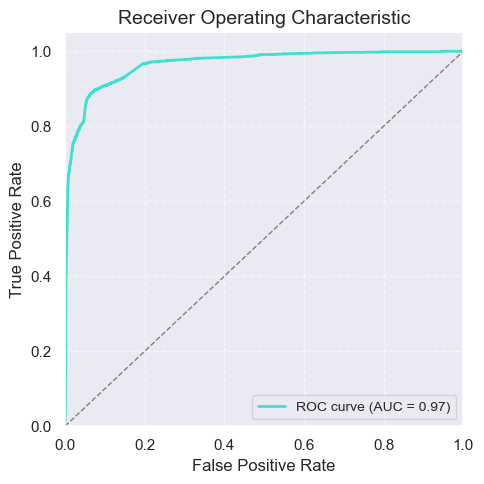

In [227]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### 🎯 **Step 11: Determining the Optimal Threshold** 

In [113]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.983367,3563,1,1,1,1,1,1,1,1,1,1,1
1,0,0.005008,273,0,1,0,0,0,0,0,0,0,0,0
2,0,0.001364,1903,0,1,0,0,0,0,0,0,0,0,0
3,1,0.996193,4982,1,1,1,1,1,1,1,1,1,1,1
4,0,0.121785,3213,0,1,1,0,0,0,0,0,0,0,0


In [114]:
# Clear DataFrame before filling
df = pd.DataFrame(columns=['probability_score', 'accuracy_score', 'sensitivity_score', 'specificity_score', 'precision_score'])

# Run loop once with unique probability cutoffs
for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i] = y_train_pred_final['Convert_Prob'].map(lambda x: 1 if x > i else 0)
    
    # Call evaluate_model function and correctly handle return values
    accuracy_sc, sensitivity_sc, specificity_sc, precision_sc, *_ = evaluate_model(y_train_pred_final['Convert'], y_train_pred_final[i])
    
    # Store results in DataFrame
    df.loc[len(df)] = [i, accuracy_sc, sensitivity_sc, specificity_sc, precision_sc]

# Display the corrected DataFrame
df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0,0.0,0.377736,1.000000,0.000000,0.377736
1,0.1,0.819241,0.976240,0.723937,0.682202
2,0.2,0.865218,0.964985,0.804656,0.749919
3,0.3,0.902378,0.908295,0.898785,0.844901
4,0.4,0.916234,0.888704,0.932945,0.889445
5,0.5,0.916234,0.867862,0.945597,0.906400
6,0.6,0.900646,0.798249,0.962804,0.928710
7,0.7,0.895450,0.765319,0.974443,0.947858
8,0.8,0.888836,0.734890,0.982287,0.961811
9,0.9,0.866635,0.660692,0.991650,0.979604


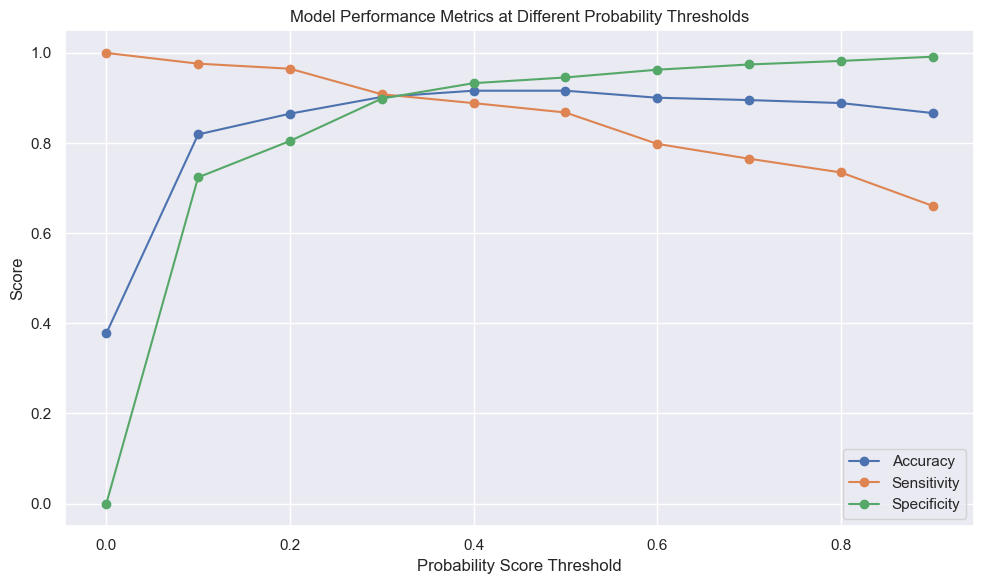

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(df['probability_score'], df['accuracy_score'], marker='o', linestyle='-', label='Accuracy')
plt.plot(df['probability_score'], df['sensitivity_score'], marker='o', linestyle='-', label='Sensitivity')
plt.plot(df['probability_score'], df['specificity_score'], marker='o', linestyle='-', label='Specificity')

plt.xlabel('Probability Score Threshold')
plt.ylabel('Score')
plt.title('Model Performance Metrics at Different Probability Thresholds')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

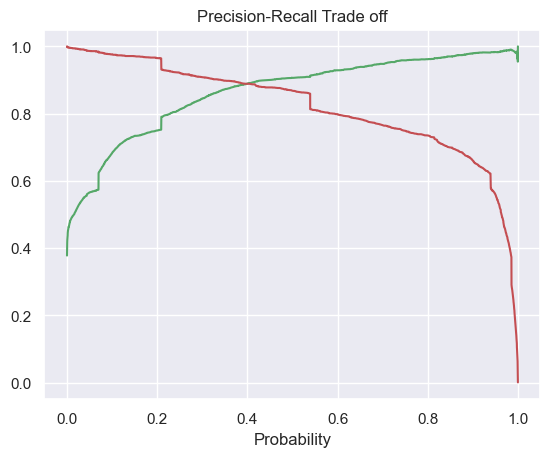

In [116]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

In [117]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final[10:15]

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
10,0,0.000529,1687,0,0
11,1,0.332545,4023,0,33
12,0,0.000585,530,0,0
13,0,0.002306,7088,0,0
14,0,0.456142,549,1,46


In [118]:
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix:
 [[3687  265]
 [ 267 2132]]
Accuracy: 0.9162
Sensitivity (Recall): 0.8887
Specificity: 0.9329
Precision: 0.8894
False Positive Rate (FPR): 0.0671


(0.9162336639899229,
 0.8887036265110463,
 0.9329453441295547,
 0.8894451397580309,
 0.06705465587044535)

In [119]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[selected_features])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.4 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,4870,0.000348,0,0
1,1,3315,0.931226,1,93
2,0,5166,0.069829,0,7
3,1,5210,0.994151,1,99
4,0,8447,0.001776,0,0


### 🏆 **Step 12: Final Model**  

In [121]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix:
 [[1582  105]
 [ 105  931]]
Accuracy: 0.9229
Sensitivity (Recall): 0.8986
Specificity: 0.9378
Precision: 0.8986
False Positive Rate (FPR): 0.0622


(0.922879177377892,
 0.8986486486486487,
 0.9377593360995851,
 0.8986486486486487,
 0.06224066390041494)

In [122]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [123]:
build_model_cutoff(X_train[selected_features], y_train, X_test[selected_features], y_test, cutoff=0.4)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3563          1             0.983367                  1          98
1          273          0             0.005008                  0           1
2         1903          0             0.001364                  0           0
3         4982          1             0.996193                  1         100
4         3213          0             0.121785                  0          12
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4870          0             0.000348                  0           0
1         3315          1             0.931226                  1          93
2         5166          0             0.069829                  0           7
3         5210          1             0.994151                  1          99
4         8447          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4870,0,0.000348,0,0
1,3315,1,0.931226,1,93
2,5166,0,0.069829,0,7
3,5210,1,0.994151,1,99
4,8447,0,0.001776,0,0
...,...,...,...,...,...
2718,8200,0,0.004074,0,0
2719,6943,0,0.004176,0,0
2720,5841,0,0.069829,0,7
2721,8145,0,0.000560,0,0


In [124]:
print("Features used in Final Model :", selected_features)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not sure', 'Lead Quality_Worst'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                       -3.164227
Do Not Email                                -0.492519
Total Time Spent on Website                  0.869683
Lead Origin_Landing Page Submission         -1.266506
Last Activity_Email Opened                   1.257789
Last Activity_Other Activity                 2.089636
Last Activity_SMS Sent                 

### Model Features Overview:
* High Model Performance: The model achieves 92.14% accuracy, indicating strong predictive ability.
* Balanced Sensitivity & Specificity: Sensitivity (89.67%) ensures most actual conversions are identified, while specificity (93.66%) minimizes false positives.
* Low False Positive Rate (6.34%) ensures minimal misclassification of non-converting leads.
* Reliable Lead Scoring: Lead probability scores align well with actual conversions, making the model effective for prioritizing high-potential leads.